In [20]:
f = None
fichier_a_lire = "exemple_1.txt"

try:
    f = open(fichier_a_lire, "r", encoding="utf-8")
    contenu = f.read()

    print("---Contenu lu avec succès")
    print(contenu)

except FileNotFoundError:
   print(f"Erreur: le fichier '{fichier_a_lire}'n'a pas été trouvé")
except UnicodeDecodeError:
   print("Erreur:l'encodage 'utf-8' spéicifié n'a pas pu décoder les octets du fichier.")

finally:
    if f is not None:
        f.close()
        print("\n Le fichier a été fermé manuellement dans le bloc 'finally'.")

Erreur: le fichier 'exemple_1.txt'n'a pas été trouvé


In [21]:
with open("exemple_1.txt", "r", encoding="utf-8") as fichier:
    contenu = fichier.read()
    print(f'Contenu du fichier{contenu}')

with open("exemple_1.txt", "w", encoding="utf-8") as fichier:
    fichier.write("Bonjour, monde !")

with open("exemple_1.txt", "a", encoding="utf-8") as fichier:
    fichier.write("\n Nouvelle ligne ajoutée")
    
with open("exemple_1.txt", "r+", encoding="utf-8") as fichier:
    donnees = fichier.read()
    print(f'Contenu du fichier{donnees}')
    fichier.write("\n Fin de l'exercice")

FileNotFoundError: [Errno 2] No such file or directory: 'exemple_1.txt'

In [29]:
import random
fruits = ["pomme", "banane", "orange", "kiwi", "mangue"]
fruit_choisi = random.choice(fruits)
print("Fruit Choisi:", fruit_choisi)

Fruit Choisi: mangue


In [30]:
Txtuser = input("Ecris au moins 12 caractères dont 1 majuscule, 1 minscule, 1 caractère sépcial et 1 chiffre")
print(Txtuser)

testdelamort


In [31]:
import string
def mdp_CNIL(size=12, char=string.ascii_uppercase + string.digits + string.ascii_lowercase):
    return ''.join(random.choice(char) for _ in range(size))

print("Ton mdp de 12 caractères est le suivant :" ,mdp_CNIL)


Ton mdp de 12 caractères est le suivant : <function mdp_CNIL at 0x10e67b940>


In [32]:
import string, random

size = int(input("Saisissez la taille du mdp (au moins 12): "))

def mdp_CNIL(size, specials="!@#$%&*", chars=string.ascii_uppercase + string.ascii_lowercase + string.digits + "!@#$%&*"):
    if size < 12:
        raise ValueError("size doit être au moins 12")
    # garantir 1 de chaque type
    pwd = [
        random.choice(string.ascii_uppercase),
        random.choice(string.ascii_lowercase),
        random.choice(string.digits),
        random.choice(specials)
    ]
    # compléter jusqu'à la taille demandée
    pwd += [random.choice(chars) for _ in range(size - 4)]
    random.shuffle(pwd)
    return "".join(pwd)

# Appel avec la taille choisie
print("Ton mdp de", size, "caractères est le suivant :", mdp_CNIL(size))

Ton mdp de 13 caractères est le suivant : dAVK@!c32$Avj


In [ ]:
import random

# Question 1 :
liste_mdp = ["123456", "password", "admin", "123456789", "qwerty",
             "abc123", "letmein", "welcome", "monkey", "football"]

# Question 2 :
random.choice(liste_mdp)
secret = random.choice(liste_mdp) #pour Question 3
longeur_ref = len(secret)

# Question 3 :
print("Devine le mot de passe.")
while True:
    proposition = input("Ta proposition : ").strip()
    if proposition == secret:
        print("Bravo ! Tu as deviné le mot de passe.")
        break
    else:
        print("Non, essaie encore.")



Devine le mot de passe.
Non, essaie encore.
Non, essaie encore.
Non, essaie encore.


In [ ]:
import random

# Question 1 :
liste_mdp = ["123456", "password", "admin", "123456789", "qwerty",
             "abc123", "letmein", "welcome", "monkey", "football"]

secret = random.choice(liste_mdp) #pour Question 3
longeur_ref = len(secret)

#Question 4 :
print("Devine le mot de passe.")

while True:
    proposition = input("Ta proposition : ").strip()
    
    if proposition == secret:
        print("Bravo ! Tu as deviné le mot de passe.")
        break  # on sort, donc plus d'indications après
    else:
        if len(proposition) != longeur_ref:
            print("Indice : la longueur n'est pas bonne.")
        else:
            print("Indice : la longueur est bonne, mais le mot est incorrect.")



Devine le mot de passe.


In [ ]:
#Question 5 :
import random
essai = 0
limite = 5

# Question 1 :
liste_mdp = ["123456", "password", "admin", "123456789", "qwerty",
             "abc123", "letmein", "welcome", "monkey", "football"]

secret = random.choice(liste_mdp) #pour Question 3
longeur_ref = len(secret)

#Question 4 :
print("Devine le mot de passe.")

while True:
    proposition = input("Ta proposition : ").strip()
    essai +=1
    
    if proposition == secret:
        print(f"Bravo ! Tu as deviné le mot de passe en {essai} essai(s).")
        break  # on sort, donc plus d'indications après
    else:
        if len(proposition) != longeur_ref:
            print("Indice : la longueur n'est pas bonne.")
        else:
            print("Indice : la longueur est bonne, mais le mot est incorrect.")

# afficher le nombre d'essais restants
    print(f"Il te reste {limite - essai} essai(s).")

In [1]:
import random
from datetime import datetime, timedelta
from pathlib import Path

# -----------------------------
# Configuration générale
# -----------------------------
N_EVENTS = 100   # Nombre de logs à générer
DAYS_RANGE = 1   # Étendue de temps (en jours)
OUT_FILE = "synthetic_system.log"

HOSTS = ["srv-web01", "srv-web02", "db-master", "db-replica", "fw1"]
PROCS = ["sshd", "nginx", "postgres", "systemd", "cron"]
LEVELS = ["INFO", "WARNING", "ERROR", "CRITICAL"]

MESSAGES = [
    "connexion acceptée depuis {ip}",
    "échec d'authentification utilisateur {user}",
    "latence élevée: {lat} ms",
    "erreur I/O sur disque {dev}",
    "redémarrage du service {proc}",
    "paquet dropped par firewall"
]

# -----------------------------
# Fonctions utilitaires
# -----------------------------

def random_ip():
    """Retourne une adresse IPv4 aléatoire."""
    # TODO : générer 4 entiers entre 1 et 254 et les concaténer avec "."
    return "0.0.0.0"  # à remplacer


def random_user():
    """Retourne un utilisateur choisi aléatoirement."""
    users = ["alice", "bob", "admin", "guest", "monitor"]
    # TODO : choisir un élément de la liste users avec random.choice
    return "user"  # à remplacer


def random_dev():
    """Retourne un périphérique disque aléatoire."""
    devices = ["/dev/sda1", "/dev/nvme0n1", "/dev/sdb"]
    # TODO : choisir un élément de la liste devices avec random.choice
    return "/dev/xxx"  # à remplacer


# -----------------------------
# Boucle de génération
# -----------------------------
def main():
    # Point de départ temporel (aujourd'hui - DAYS_RANGE)
    start_time = datetime.now() - timedelta(days=DAYS_RANGE)
    events = []

    for i in range(N_EVENTS):
        # TODO : générer un delta aléatoire en secondes
        delta_seconds = 0  # à remplacer

        ts = start_time + timedelta(seconds=delta_seconds)
        ts_iso = ts.isoformat(sep=' ', timespec='seconds')

        # TODO : choisir un host, un process, et un niveau
        host = "???"
        proc = "???"
        level = "???"

        # TODO : choisir un modèle de message et le compléter avec format()
        template = "message à compléter"
        msg = template.format(
            ip=random_ip(),
            user=random_user(),
            lat=f"{random.uniform(10, 2000):.1f}",
            dev=random_dev(),
            proc=proc
        )

        # Format d’un log texte :
        # 2025-09-29 10:23:45 srv-web01 nginx[1234]: INFO connexion acceptée depuis 192.168.1.10
        line = f"{ts_iso} {host} {proc}[{random.randint(1000,9999)}]: {level} {msg}"

        events.append((ts, line))

    # Trier les événements par timestamp
    events.sort(key=lambda x: x[0])
    lines = [line for _, line in events]

    # Écrire dans un fichier texte
    with Path(OUT_FILE).open("w", encoding="utf-8") as f:
        for line in lines:
            f.write(line + "\n")

    print(f"{len(lines)} événements générés dans {OUT_FILE}")


if __name__ == "__main__":
    main()

100 événements générés dans synthetic_system.log


In [2]:
# Question 1 : constantes de configuration
N_EVENTS = 100   # Nombre de logs à générer
DAYS_RANGE = 1   # Étendue temporelle en jours (génère des événements sur les N derniers jours)
OUT_FILE = "synthetic_system.log"  # nom du fichier de sortie

HOSTS = ["srv-web01", "srv-web02", "db-master", "db-replica", "fw1"]
PROCS = ["sshd", "nginx", "postgres", "systemd", "cron"]
LEVELS = ["INFO", "WARNING", "ERROR", "CRITICAL"]

MESSAGES = [
    "connexion acceptée depuis {ip}",
    "échec d'authentification utilisateur {user}",
    "latence élevée: {lat} ms",
    "erreur I/O sur disque {dev}",
    "redémarrage du service {proc}",
    "paquet dropped par firewall"
]

Explication rapide :
N_EVENTS contrôle combien de lignes seront écrites.
DAYS_RANGE indique la fenêtre temporelle (ici derniers DAYS_RANGE jours).
HOSTS, PROCS, LEVELS, MESSAGES servent à tirer au hasard les composants d’un log.

In [3]:
#Les prochains blocs correspondent tous à la question 2
import random

def random_ip():
    for i in range(4):
        return ".".join(str(random.randint(1, 254)))

In [4]:
def random_dev():
    """Choisit aléatoirement un périphérique disque."""
    devices = ["/dev/sda1", "/dev/nvme0n1", "/dev/sdb"]
    return random.choice(devices)

In [5]:
def random_user():
    users = ["alice", "bob", "admin", "guest", "monitor"]
    return random.choice(users)

Commentaires :
random.choice(seq) renvoie un élément aléatoire d'une séquence.
random.randint(a, b) renvoie un entier compris entre a et b inclus.

In [6]:
def main():
    # Point de départ temporel (aujourd'hui - DAYS_RANGE)
    start_time = datetime.now() - timedelta(days=DAYS_RANGE)
    events = []

In [7]:
import re 

email_pattern = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
email = input("Saisissez votre adresse mail :")

if re.match(email_pattern, email):
    print("Adresse email valide")
else:
    print("Adresse email non valide")

Adresse email non valide


In [8]:
import re

test_ipv4 = r'^[0-9]+\.[0-9]+\.[0-9]+\.[0-9]+$'
ipv4 = input("saisissez une adresse ip")

if re.match(test_ipv4, ipv4):
    print("Adresse mail valide")
else :
    print("Adresse ip pas valide")

Adresse mail valide


In [9]:
import re

# Expression régulière pour IPv4 valide (0-255 pour chaque octet)
test_ipv4 = r'^((25[0-5]|2[0-4][0-9]|1[0-9]{2}|[1-9]?[0-9])\.){3}' \
            r'(25[0-5]|2[0-4][0-9]|1[0-9]{2}|[1-9]?[0-9])$'

ipv4 = input("Saisissez une adresse IP : ")

if re.match(test_ipv4, ipv4):
    print("Adresse IP valide")
else:
    print("Adresse IP pas valide")


Adresse IP valide


In [10]:
# 1. Définir le chemin complet vers le fichier
path = "/Users/lp1/Downloads/auth.log"  # remplace TonNomUtilisateur par ton nom exact

# 2. Ouvrir le fichier auth.log à partir du chemin complet
with open(path, "r", encoding="utf-8") as f:
    lines = f.readlines()  # lines contient maintenant toutes les lignes du fichier

# 3. Extraire toutes les lignes contenant "Failed password"
failed_lines = [line for line in lines if "Failed password" in line]

# 4. Afficher le nombre de lignes trouvées
print(f"Nombre de lignes avec 'Failed password' : {len(failed_lines)}")

Nombre de lignes avec 'Failed password' : 12


3. Extraire les adresses IP de ces lignes à l’aide d’une expression régulière

In [11]:
import re
from collections import Counter

# Regex simple pour capturer une adresse IPv4
ip_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')

# Liste pour stocker toutes les IPs trouvées
ips = []

for line in failed_lines:
    match = ip_regex.search(line)
    if match:
        ips.append(match.group())

# Afficher quelques IPs pour vérifier
print("Exemples d'IPs extraites :")
print(ips[:10])  # affiche les 10 premières

Exemples d'IPs extraites :
['192.168.1.12', '203.0.113.5', '203.0.113.5', '10.0.0.10', '198.51.100.23', '192.168.1.12', '192.168.1.12', '203.0.113.5', '192.0.2.44', '203.0.113.5']


4. Compter le nombre d’occurrences de chaque IP

In [12]:
from collections import Counter

# Compter combien de fois chaque IP apparaît
ip_counts = Counter(ips)

# Afficher toutes les IPs et leur nombre d'occurrences (optionnel)
for ip, count in ip_counts.items():
    print(f"{ip} : {count} échecs")

192.168.1.12 : 3 échecs
203.0.113.5 : 4 échecs
10.0.0.10 : 1 échecs
198.51.100.23 : 3 échecs
192.0.2.44 : 1 échecs


5. Afficher les 5 IPs ayant généré le plus d’échecs

In [ ]:
# Récupérer les 5 IPs les plus fréquentes
top_5 = ip_counts.most_common(5)

print("Top 5 IPs ayant généré le plus d'échecs :")
for ip, count in top_5:
    print(f"{ip} : {count} échecs")

Top 5 IPs ayant généré le plus d'échecs :
203.0.113.5 : 4 échecs
192.168.1.12 : 3 échecs
198.51.100.23 : 3 échecs
10.0.0.10 : 1 échecs
192.0.2.44 : 1 échecs


In [14]:
import re
from collections import Counter

#Définir le chemin complet vers le fichier
path = "/Users/lp1/Downloads/auth.log"  # remplace TonNomUtilisateur par ton nom exact

#Ouvrir le fichier auth.log à partir du chemin complet
with open(path, "r", encoding="utf-8") as f:
    lines = f.readlines()  # lines contient maintenant toutes les lignes du fichier

#Extraire toutes les lignes contenant "Failed password"
failed_lines = [line for line in lines if "Failed password" in line]
print(f"Nombre de lignes avec 'Failed password' : {len(failed_lines)}")

#Extraire les adresses IP à l'aide d'une regex
ip_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')
ips = [ip_regex.search(line).group() for line in failed_lines if ip_regex.search(line)]

#Afficher quelques IPs pour vérifier
print("Exemples d'IPs extraites :")
print(ips[:10])

# Compter combien de fois chaque IP apparaît
ip_counts = Counter(ips)

# Afficher les 5 IPs ayant généré le plus d'échecs
top_5 = ip_counts.most_common(5)
print("Top 5 IPs ayant généré le plus d'échecs :")
for ip, count in top_5:
    print(f"{ip} : {count} échecs")


Nombre de lignes avec 'Failed password' : 12
Exemples d'IPs extraites :
['192.168.1.12', '203.0.113.5', '203.0.113.5', '10.0.0.10', '198.51.100.23', '192.168.1.12', '192.168.1.12', '203.0.113.5', '192.0.2.44', '203.0.113.5']
Top 5 IPs ayant généré le plus d'échecs :
203.0.113.5 : 4 échecs
192.168.1.12 : 3 échecs
198.51.100.23 : 3 échecs
10.0.0.10 : 1 échecs
192.0.2.44 : 1 échecs


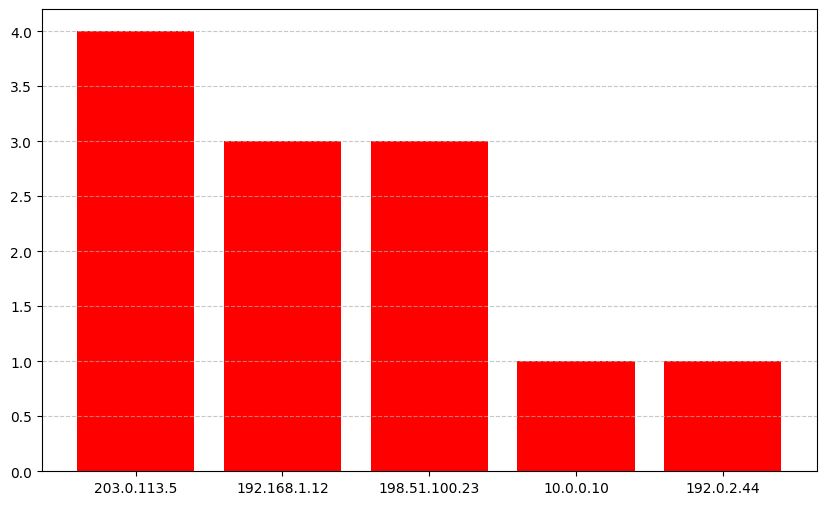

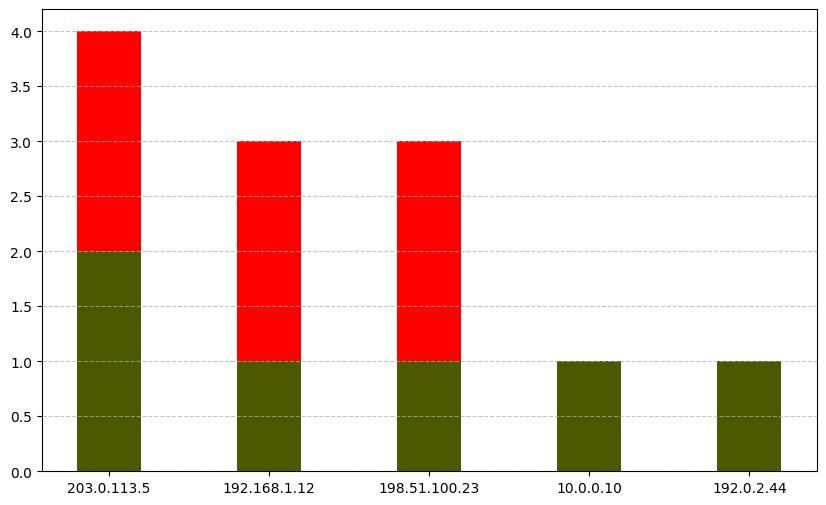

In [15]:
import matplotlib.pyplot as plt

# --- 1. Définir le chemin du fichier ---
path = "/Users/lp1/Downloads/auth.log"  # adapte si nécessaire

# --- 2. Lire le fichier ---
with open(path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# --- 3. Séparer lignes échouées et réussies ---
failed_lines = [line for line in lines if "Failed password" in line]
accepted_lines = [line for line in lines if "Accepted password" in line]

# --- 4. Extraire les adresses IP ---
ip_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')

failed_ips = [ip_regex.search(line).group() for line in failed_lines if ip_regex.search(line)]
accepted_ips = [ip_regex.search(line).group() for line in accepted_lines if ip_regex.search(line)]

# --- 5. Compter occurrences ---
failed_counts = Counter(failed_ips)
accepted_counts = Counter(accepted_ips)

# --- 6. Top 5 IPs échouées pour le graphique ---
top_failed = failed_counts.most_common(5)
ips_failed, counts_failed = zip(*top_failed)  # dézip pour matplotlib

# --- 7. Visualisation ---
plt.figure(figsize=(10,6))
plt.bar(ips_failed, counts_failed, color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Bonus : comparaison avec les réussites ---
# On ne compare que les IPs présentes dans les échecs
success_counts_for_failed_ips = [accepted_counts.get(ip, 0) for ip in ips_failed]

plt.figure(figsize=(10,6))
width = 0.4
plt.bar(ips_failed, counts_failed, width=width, color='red')
plt.bar([ip for ip in ips_failed], success_counts_for_failed_ips, width=width, color='green', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TP 3

In [16]:
# load_access_log.py
import re
import pandas as pd
from datetime import datetime

## Question 1

# chemin vers le fichier access.log
PATH = "/Users/lp1/Downloads/access.log"  # adapte si nécessaire

log_filtre = re.compile(
    r'^(?P<ip>\b(?:\d{1,3}\.){3}\d{1,3}\b)\s+'           # IP
    r'(?P<ident>\S+)\s+'                                 # identd, souvent '-'
    r'(?P<authuser>\S+)\s+'                              # user auth, souvent '-'
    r'\[(?P<datetime>[^\]]+)\]\s+'                       # [10/Apr/2024:12:00:00 +0000]
    r'"(?P<request>[^"]*)"\s+'                           # "GET /foo HTTP/1.1"
    r'(?P<status>\d{3})\s+'                              # status code
    r'(?P<size>\S+)\s*'                                  # size or '-'
    r'(?:\"(?P<referer>[^\"]*)\"\s+\"(?P<agent>[^\"]*)\")?'  # optional "referer" "user-agent"
)

# fonction pour parser une ligne
def parse_line(line):
    m = log_filtre.match(line)
    if not m:
        return None
    d = m.groupdict()

    # split request into method/path/proto
    req = d.get('request') or ""
    parts = req.split()
    method, path, proto = (parts + [None, None, None])[:3]

    # parse datetime -> datetime object
    dt_str = d.get('datetime')  # ex: 10/Apr/2024:12:00:00 +0000
    dt = None
    try:
        dt = datetime.strptime(dt_str, "%d/%b/%Y:%H:%M:%S %z")
    except Exception:
        try:
            dt = datetime.strptime(dt_str.split()[0], "%d/%b/%Y:%H:%M:%S")
        except Exception:
            dt = None

    # size convert
    size = d.get('size')
    size = int(size) if size and size.isdigit() else None

    return {
        'ip': d.get('ip'),
        'ident': d.get('ident'),
        'authuser': d.get('authuser'),
        'datetime': dt,
        'method': method,
        'path': path,
        'protocol': proto,
        'status': int(d.get('status')) if d.get('status') else None,
        'size': size,
        'referer': d.get('referer'),
        'agent': d.get('agent'),
        'raw_request': d.get('request'),
        'raw_line': line.rstrip('\n')
    }

def load_log_to_df(path):
    records = []
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            parsed = parse_line(line)
            if parsed:
                records.append(parsed)
    df = pd.DataFrame.from_records(records)
    return df

if __name__ == "__main__":
    df = load_log_to_df(PATH)
    print(f"Lignes parsées : {len(df)}")
    # aperçu
    print(df.head(10))

Lignes parsées : 14
              ip ident authuser                  datetime method  \
0   192.168.1.10     -        - 2025-05-30 08:12:01+00:00    GET   
1    203.0.113.5     -        - 2025-05-30 08:13:45+00:00    GET   
2  198.51.100.23     -        - 2025-05-30 08:14:17+00:00   POST   
3    203.0.113.5     -        - 2025-05-30 08:15:22+00:00    GET   
4   192.168.1.11     -        - 2025-05-30 08:16:03+00:00    GET   
5  198.51.100.23     -        - 2025-05-30 08:17:44+00:00    GET   
6     192.0.2.45     -        - 2025-05-30 08:18:27+00:00    GET   
7   192.168.1.10     -        - 2025-05-30 08:19:59+00:00    GET   
8    203.0.113.5     -        - 2025-05-30 08:20:10+00:00    GET   
9     192.0.2.45     -        - 2025-05-30 08:21:33+00:00    GET   

              path  protocol  status  size referer agent  \
0      /index.html  HTTP/1.1     200  None    None  None   
1   /notfound.html  HTTP/1.1     404  None    None  None   
2           /login  HTTP/1.1     200  None    None 

In [17]:
# Ouvrir le fichier log
with open("/Users/lp1/Downloads/access.log", "r") as f:
    lignes = f.readlines()

# Expression régulière pour trouver les lignes dont le status est 404
pattern = re.compile(r'\s404\s')

# Filtrer les lignes avec l'erreur 404
lignes_404 = [ligne for ligne in lignes if re.search(pattern, ligne)]

# Afficher le résultat
for ligne in lignes_404:
    print(ligne.strip())

203.0.113.5 - - [30/May/2025:08:13:45 +0000] "GET /notfound.html HTTP/1.1" 404 "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
203.0.113.5 - - [30/May/2025:08:15:22 +0000] "GET /robots.txt HTTP/1.1" 404 "Googlebot/2.1 (+http://www.google.com/bot.html)"
198.51.100.23 - - [30/May/2025:08:17:44 +0000] "GET /admin HTTP/1.1" 404 "Mozilla/5.0 (compatible; Bingbot/2.0; +http://www.bing.com/bingbot.htm)"
192.0.2.45 - - [30/May/2025:08:18:27 +0000] "GET /page-not-found HTTP/1.1" 404 "curl/7.68.0"
203.0.113.5 - - [30/May/2025:08:20:10 +0000] "GET /missing HTTP/1.1" 404 "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
192.0.2.45 - - [30/May/2025:08:21:33 +0000] "GET /nope HTTP/1.1" 404 "spiderbot/1.0"
198.51.100.23 - - [30/May/2025:08:22:14 +0000] "GET /doesnotexist HTTP/1.1" 404 "Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)"


In [18]:
from collections import Counter
ips = [re.match(r'^(\d+\.\d+\.\d+\.\d+)', ligne).group(1) for ligne in lignes_404]
top_5 = Counter(ips).most_common(5)
print(top_5)


[('203.0.113.5', 3), ('198.51.100.23', 2), ('192.0.2.45', 2)]


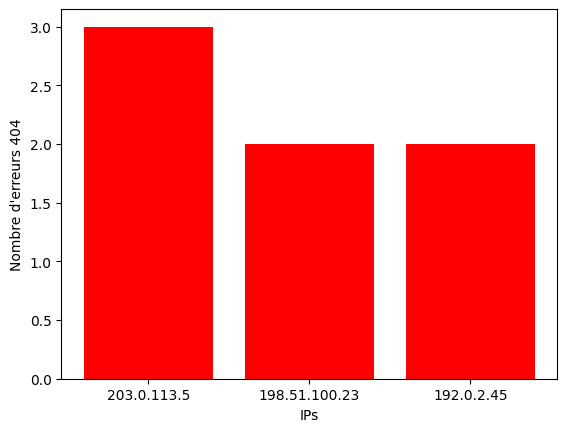

In [19]:
import matplotlib.pyplot as plt

# Extraire les IPs et leurs comptes
ips, comptes = zip(*Counter([re.match(r'^(\d+\.\d+\.\d+\.\d+)', ligne).group(1) for ligne in lignes_404]).most_common(5))

# Créer l'histogramme
plt.bar(ips, comptes, color='red')
plt.xlabel("IPs")
plt.ylabel("Nombre d'erreurs 404")
plt.show()


In [22]:
import socket
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

server_address = ("localhost", 8888)

server_socket.bind(server_address)

server_socket.listen(1)
print("Le server est prêt à écouter les connexions entrantes.")

client_address, client_socket = server_socket.accept()
print("Connexion établie avec:", client_address)

server_socket.close()

Le server est prêt à écouter les connexions entrantes.


KeyboardInterrupt: 

In [ ]:
import socket 
ip = "127.0.0.1"
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
result = sock.connect_ex((ip, port))
sock_time = sock.settimeout(1)

for port in range (20,80):
    if result == 0:
        print("Port ouvert")
    else:
        print("Port fermé")
sock.close()



Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé
Port fermé


In [ ]:
import threading 
import time

def worker(name):
    for i in range(5):
        print(f"[{name}]étape {i}")
        time.sleep(0,5)

t1 = threading.Thread(target=worker, args=("Thread 1"))
t2 = threading.Thread(target=worker, args=("Thread 2"))

print("Démarrage threads")
t1.start()
t2.start()

t1.join()
t2.join()

print("Tous les threads sont terminés")



Exception in thread Thread-62:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-63:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/lp1/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 772, in run_closure
    self.run()
  File "/Users/lp1/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py", line 910, in run
    _threading_Thread_run(self)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python

Démarrage threads
Tous les threads sont terminés


In [ ]:
import socket
import argparse
import sys
import time
import threading

# --- Configuration et Interface (argparse) ---
parser = argparse.ArgumentParser(description="Mini-scanner de ports TCP simple.")
parser.add_argument("--ip", type=str, required=True, help="Adresse IP cible (ex: 192.168.1.1)")
parser.add_argument("--start-port", type=int, default=1, help="Port de début de la plage (ex: 20)")
parser.add_argument("--end-port", type=int, default=1024, help="Port de fin de la plage (ex: 1024)")

# L'appel à parse_args() est bien placé ici
args = parser.parse_args() 

# Définition des variables (Utilisation de 'args')
TARGET_IP = args.ip
START_PORT = args.start_port
END_PORT = args.end_port
TIMEOUT = 1  

print(f"Démarrage du scan sur {TARGET_IP} de {START_PORT} à {END_PORT}...")
start_time = time.time()

# --- Fonction de Scan ---
def scan_ports():

    ports_ouverts = []

    for port in range(START_PORT, END_PORT + 1):  
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        sock.settimeout(TIMEOUT)

        result = sock.connect_ex((TARGET_IP, port))
        
        if result == 0:
            print(f"Port {port} est ouvert")
            ports_ouverts.append(port)
        
        sock.close()

    return ports_ouverts




# version Multithreadée

def worker(name):
    for i in range(5):
        print(f"[{name}]étape {i}")
        time.sleep(0,5)

t1 = threading.Thread(target=worker, args=("Thread 1"))
t2 = threading.Thread(target=worker, args=("Thread 2"))

print("Démarrage threads")
t1.start()
t2.start()

t1.join()
t2.join()

print("Tous les threads sont terminés")




# --- Exécution ---
open_ports = scan_ports()

end_time = time.time()
print("-" * 30)

if open_ports:
    print(f"Scan terminé. Ports ouverts trouvés: {sorted(open_ports)}")
else:
    print("Scan terminé. Aucun port ouvert trouvé.")

Exception in thread Exception in thread Thread-70:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py", line 973, in _bootstrap_inner
Thread-69:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/lp1/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 772, in run_closure
    self.run()
  File "/Users/lp1/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/threading.py", line 910, in run
    _threading_Thread_run(self)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python

Démarrage du scan sur 127.0.0.1 de 20 à 80...
Démarrage threads
Tous les threads sont terminés
------------------------------
Scan terminé. Aucun port ouvert trouvé.


In [ ]:
import psutil  

#Mémoire RAM
memory_info = psutil.virtual_memory()
print(f'mémoire totale : {memory_info.total / (1024 ** 3):.2f} GB')
print(f'Mémoire utilisée : {memory_info.used / (1024 ** 3):.2f} GB')
print(f'Mémoire utilisée : {memory_info.available / (1024 ** 3):.2f} GB')


mémoire totale : 18.00 GB
Mémoire utilisée : 8.05 GB
Mémoire utilisée : 5.82 GB


In [ ]:
import psutil

for partition in psutil.disk_partitions():
    usage = psutil.disk_usage(partition.mountpoint)
    ...
#pour checker l'espace disque etc


In [ ]:
import psutil
net_io = psutil.net_io_counters()

print(f"Octets envoyés : {net_io.bytes_sent / (1024 ** 2):.2f} MB")
print(f"Octets reçus : {net_io.bytes_recv / (1024 ** 2):.2f} MB")

Octets envoyés : 48.48 MB
Octets reçus : 424.14 MB


In [ ]:
import psutil # C'est indispensable pour utiliser psutil

def afficher_statistiques_reseau():
    # 1. Récupère les statistiques par interface (pernic=True)
    net_stats = psutil.net_io_counters(pernic=True)

    print("--- Statistiques Réseau Détaillées (par Interface) ---")
    
    # 2. Boucle sur chaque interface et affiche les statistiques
    for interface, stats in net_stats.items():
        print(f"\n### Interface: {interface} ###")
        print(f"  Octets Envoyés: {stats.bytes_sent / (1024*1024):.2f} Mo")
        print(f"  Octets Reçus:   {stats.bytes_recv / (1024*1024):.2f} Mo")
        print(f"  Paquets Envoyés: {stats.packets_sent:,}")
        print(f"  Paquets Reçus:   {stats.packets_recv:,}")
        print(f"  Erreurs en Réception (errin): {stats.errin}")
        print(f"  Erreurs en Envoi (errout): {stats.errout}")
        print(f"  Paquets Reçus Abandonnés (dropin): {stats.dropin}")
        print(f"  Paquets Envoyés Abandonnés (dropout): {stats.dropout}")

# 3. Appel de la fonction pour lancer l'exécution
if __name__ == "__main__":
    afficher_statistiques_reseau()

--- Statistiques Réseau Détaillées (par Interface) ---

### Interface: lo0 ###
  Octets Envoyés: 1.17 Mo
  Octets Reçus:   1.17 Mo
  Paquets Envoyés: 2,271
  Paquets Reçus:   2,271
  Erreurs en Réception (errin): 0
  Erreurs en Envoi (errout): 0
  Paquets Reçus Abandonnés (dropin): 0
  Paquets Envoyés Abandonnés (dropout): 0

### Interface: gif0 ###
  Octets Envoyés: 0.00 Mo
  Octets Reçus:   0.00 Mo
  Paquets Envoyés: 0
  Paquets Reçus:   0
  Erreurs en Réception (errin): 0
  Erreurs en Envoi (errout): 0
  Paquets Reçus Abandonnés (dropin): 0
  Paquets Envoyés Abandonnés (dropout): 0

### Interface: stf0 ###
  Octets Envoyés: 0.00 Mo
  Octets Reçus:   0.00 Mo
  Paquets Envoyés: 0
  Paquets Reçus:   0
  Erreurs en Réception (errin): 0
  Erreurs en Envoi (errout): 0
  Paquets Reçus Abandonnés (dropin): 0
  Paquets Envoyés Abandonnés (dropout): 0

### Interface: anpi2 ###
  Octets Envoyés: 0.00 Mo
  Octets Reçus:   0.00 Mo
  Paquets Envoyés: 0
  Paquets Reçus:   0
  Erreurs en Réception 

###TP 5 Python

psutil.cpu_percent()	Retourne l'utilisation CPU actuelle en pourcentage (depuis le dernier appel). Peut être par cœur si percpu=True.	float (ou liste de float)
psutil.virtual_memory()	Retourne les statistiques sur l'utilisation de la RAM (mémoire virtuelle) : totale, disponible, utilisée, libre, etc.	svmem (tuple nommé)
psutil.disk_usage('/')	Retourne les statistiques d'utilisation du disque pour le chemin spécifié (ici, la racine /).	sdiskusage (tuple nommé)
psutil.net_io_counters()	Retourne les statistiques cumulées d'activité réseau (octets, paquets, erreurs). Peut être par interface si pernic=True.	snetio (tuple nommé) ou dict

Partie 2 & 3 : Création du tableau de bord (Script Python Complet)

In [24]:
import psutil
import time
import os
# L'import de sys n'est plus nécessaire ni pour flush ni pour exit
# Tente d'importer clear_output pour les environnements interactifs (Jupyter/Notebook)
try:
    from IPython.display import clear_output
    IPYTHON_ENV = True
except ImportError:
    IPYTHON_ENV = False

# --- CONFIGURATION ET UTILITAIRES ---

def get_clear_command():
    """Détermine la commande pour effacer l'écran en fonction de l'OS."""
    return 'cls' if os.name == 'nt' else 'clear'

def convert_bytes_to_gb(bytes_value):
    """Convertit les octets en Giga-octets (Go)."""
    return bytes_value / (1024**3)

def create_bar(percent, length=20):
    """Crée une barre de progression ASCII (Bonus 2)."""
    fill = '█' * int(length * percent // 100)
    empty = '░' * (length - len(fill))
    return f"[{fill}{empty}] {percent:5.1f}%"

# --- BONUS : ENREGISTREMENT DES DONNÉES (Bonus 3) ---

def log_data(filename='system_metrics.csv'):
    """Enregistre les métriques principales dans un fichier CSV."""
    
    cpu_percent = psutil.cpu_percent(interval=None)
    mem = psutil.virtual_memory()
    net_io = psutil.net_io_counters()

    # La température est retirée
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')
    # Les données enregistrées sont : CPU, RAM (pourcentage et utilisée), Net Sent, Net Recv
    data_line = f"{timestamp},{cpu_percent:.1f},{mem.percent:.1f},{mem.used},{net_io.bytes_sent},{net_io.bytes_recv}\n"

    file_exists = os.path.exists(filename)
    
    try:
        with open(filename, 'a') as f:
            if not file_exists:
                # L'en-tête pour le fichier CSV
                header = "Timestamp,CPU_Usage_%,RAM_Usage_%,RAM_Used_Bytes,Net_Sent_Bytes,Net_Recv_Bytes\n"
                f.write(header)
            f.write(data_line)
    except IOError:
        # Ignorer les erreurs si le fichier est inaccessible
        pass

# --- FONCTIONS D'AFFICHAGE DES MÉTRIQUES ---

def display_cpu_info():
    """Affiche l'utilisation CPU globale et par cœur."""
    total_percent = psutil.cpu_percent(interval=None) 
    per_cpu_percent = psutil.cpu_percent(interval=None, percpu=True) 

    print("## 🧠 Utilisation CPU")
    print(f"Total:   {create_bar(total_percent)}") 
    
    for i, percent in enumerate(per_cpu_percent):
        print(f"Cœur {i+1}:  {create_bar(percent, length=10)}")

def display_memory_info():
    """Affiche les statistiques de la RAM (mémoire virtuelle)."""
    mem = psutil.virtual_memory()

    print("\n## 💾 Mémoire RAM")
    total_gb = convert_bytes_to_gb(mem.total)
    used_gb = convert_bytes_to_gb(mem.used)
    
    print(f"Total:     {total_gb:.2f} Go")
    print(f"Utilisée:  {used_gb:.2f} Go ({mem.percent:.1f}%)")
    print(f"Disponible: {convert_bytes_to_gb(mem.available):.2f} Go")
    print(f"Utilisée:  {create_bar(mem.percent)}")

def display_disk_info():
    """Affiche l'utilisation du disque par partition."""
    partitions = psutil.disk_partitions()
    print("\n## 💿 Utilisation Disque (Par Partition)")
    
    for p in partitions:
        try:
            if 'cdrom' in p.opts or p.fstype == '':
                continue
                
            usage = psutil.disk_usage(p.mountpoint)
            print(f"  {p.device} ({p.mountpoint})")
            print(f"  > Utilisé: {usage.percent:5.1f}% | {create_bar(usage.percent)}")
        except (PermissionError, FileNotFoundError):
             continue
            
def display_network_info():
    """Affiche les statistiques réseau globales et par interface."""
    
    io_counters = psutil.net_io_counters()
    print("\n## 🌐 Activité Réseau (Totale)")
    print(f"  Octets Envoyés: {convert_bytes_to_gb(io_counters.bytes_sent):.2f} Go")
    print(f"  Octets Reçus:   {convert_bytes_to_gb(io_counters.bytes_recv):.2f} Go")
    print(f"  Paquets Envoyés: {io_counters.packets_sent:,}")
    print(f"  Paquets Reçus:   {io_counters.packets_recv:,}")
    
    net_stats = psutil.net_io_counters(pernic=True)
    print("\n## 📶 Statistiques par Interface")
    
    for interface, stats in net_stats.items():
        if interface == 'lo' or interface.startswith('Loopback'):
            continue
            
        if stats.bytes_sent > 0 or stats.bytes_recv > 0:
            print(f"  --- {interface} ---")
            print(f"  > Envoyé: {stats.bytes_sent / (1024*1024):.2f} Mo | Reçu: {stats.bytes_recv / (1024*1024):.2f} Mo")
            print(f"  > Erreurs: In: {stats.errin}, Out: {stats.errout}")


# --- FONCTION PRINCIPALE DU TABLEAU DE BORD ---

def display_dashboard():
    """Encapsule toutes les fonctions d'affichage et gère l'effacement."""
    
    # 1. Gestion de l'effacement d'écran pour l'actualisation
    if IPYTHON_ENV:
        clear_output(wait=True)
    else:
        os.system(get_clear_command()) 

    # En-tête
    print("="*80)
    print(f"🚀 Tableau de Bord Système (psutil) | Heure: {time.strftime('%H:%M:%S')}")
    print("="*80)
    
    # CONSIGNES 3 : Affiche les sections
    display_cpu_info()
    display_memory_info()
    display_disk_info()
    display_network_info()
    
    # BONUS 3 : Enregistrement des données
    log_data() 
    
    print("-" * 80)


# --- BOUCLE PRINCIPALE ---

if __name__ == "__main__":
    
    # Initialisation pour la première lecture correcte de cpu_percent
    psutil.cpu_percent()
    
    while True:
        try:
            display_dashboard()
            
            # Attente de 5 secondes (si l'environnement le gère)
            time.sleep(5) 
            
        except (KeyboardInterrupt, Exception) as e:
            # Gère l'arrêt utilisateur (clic sur Stop/Command+C) et les erreurs inattendues
            print(f"\nArrêt de l'exécution ou erreur détectée : {type(e).__name__}")
            break # Sort de la boucle

🚀 Tableau de Bord Système (psutil) | Heure: 13:33:32
## 🧠 Utilisation CPU
Total:   [████░░░░░░░░░░░░░░░░]  22.7%
Cœur 1:  [████░░░░░░]  42.6%
Cœur 2:  [████░░░░░░]  40.1%
Cœur 3:  [███░░░░░░░]  35.7%
Cœur 4:  [███░░░░░░░]  31.2%
Cœur 5:  [██░░░░░░░░]  23.0%
Cœur 6:  [█░░░░░░░░░]  19.0%
Cœur 7:  [░░░░░░░░░░]   6.2%
Cœur 8:  [█░░░░░░░░░]  12.8%
Cœur 9:  [█░░░░░░░░░]  17.4%
Cœur 10:  [█░░░░░░░░░]  13.8%
Cœur 11:  [░░░░░░░░░░]   8.0%

## 💾 Mémoire RAM
Total:     18.00 Go
Utilisée:  7.66 Go (69.1%)
Disponible: 5.56 Go
Utilisée:  [█████████████░░░░░░░]  69.1%

## 💿 Utilisation Disque (Par Partition)
  /dev/disk3s1s1 (/)
  > Utilisé:   3.1% | [░░░░░░░░░░░░░░░░░░░░]   3.1%
  /dev/disk3s6 (/System/Volumes/VM)
  > Utilisé:   0.0% | [░░░░░░░░░░░░░░░░░░░░]   0.0%
  /dev/disk3s2 (/System/Volumes/Preboot)
  > Utilisé:   2.1% | [░░░░░░░░░░░░░░░░░░░░]   2.1%
  /dev/disk3s4 (/System/Volumes/Update)
  > Utilisé:   0.0% | [░░░░░░░░░░░░░░░░░░░░]   0.0%
  /dev/disk1s2 (/System/Volumes/xarts)
  > Utilisé:  

Le BONUS 1 n'est pas réalisable sur MAC étant donné que le système d'exploitation refuse de partager les données concernant les températures.